<a href="https://colab.research.google.com/github/belom-nlp/HSE_Lomakin_car_prices/blob/main/EDA_cars_Lomakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подержанные автомобили

Датасет содержит информацию о характеристиках и ценах подержанных автомобилей в некоторой стране

## Импорт библиотек, константы

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

In [ ]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/cars.csv"

## Загрузка и обзор данных

### Загрузка

In [ ]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `selling_price`: цена продажи, числовая

**Признаки**
- `name` (string): модель автомобиля
- `year` (numeric, int): год выпуска с завода-изготовителя
- `km_driven` (numeric, int): пробег на дату продажи
- `fuel` (categorical: _Diesel_ или _Petrol_, или _CNG_, или _LPG_, или _electric_): тип топлива
- `seller_type` (categorical: _Individual_ или _Dealer_, или _Trustmark Dealer_): продавец
- `transmission` (categorical: _Manual_ или _Automatic_): тип трансмиссии
- `owner` (categorical: _First Owner_ или _Second Owner_, или _Third Owner_, или _Fourth & Above Owner_): какой по счёту хозяин?
- `mileage` (string, по смыслу числовой): пробег, требует предобработки
- `engine` (string, по смыслу числовой): рабочий объем двигателя, требует предобработки
- `max_power` (string, по смыслу числовой): пиковая мощность двигателя, требует предобработки
- `torque` (string, по смыслу числовой, а то и 2): крутящий момент, требует предобработки
- `seats` (numeric, float; по смыслу categorical, int)

In [ ]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


Как видим, в колонках с 8 по 12 у нас есть пропуски в данных (максимум около 200). Посмотрим, совпадают они или нет.

In [ ]:
df[df.mileage.isnull()].index == df[df.engine.isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
df[df.mileage.isnull()].index == df[df.seats.isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Прекраснейшим образом совпадают. Попробуем убрать.

In [ ]:
df = df.dropna(subset=['mileage'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6797 non-null   object 
 1   year           6797 non-null   int64  
 2   selling_price  6797 non-null   int64  
 3   km_driven      6797 non-null   int64  
 4   fuel           6797 non-null   object 
 5   seller_type    6797 non-null   object 
 6   transmission   6797 non-null   object 
 7   owner          6797 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6797 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 743.4+ KB


Остается единственное незаполненное значение torque. С этим разберемся в дальнейшем.

In [ ]:
# случайные три записи из датасета
df.sample(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
132,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.5 kmpl,2987 CC,282 bhp,490Nm@ 1600rpm,5.0
982,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1200-3600rpm,7.0
667,Mahindra Bolero 2011-2019 DI - AC BS III,2016,600000,120000,Diesel,Individual,Manual,First Owner,15.96 kmpl,2523 CC,63 bhp,180Nm@ 1440-1500rpm,9.0


# Предобработка данных

Выясним, нужна ли нам переменная name.

In [ ]:
df.name.nunique()

1853

Видим, что у нас 1853 различных класса. Если делать one-hot encoding, получится 1852 лишние переменные, что сильно усложнит модель и снизит интерпретируемость данных. Этой колонкой мы вполне можем пожертвовать.

In [ ]:
df = df.drop(columns=['name'])

## Year

Посмотрим на то, какие годы представлены в колонке year, максимальное и минимальное значение.

In [ ]:
print('Число уникальных элементов в столбце:', df.year.nunique())
print('Годы представлены в диапазоне от', df.year.unique().min(), 'до', df.year.unique().max())

Число уникальных элементов в столбце: 26
Годы представлены в диапазоне от 1994 до 2020


Представляется более логичным и удобным определить на основании года возраст машины.

In [ ]:
df['age'] = 2021 - df['year']

Интересно посмотреть на распределение по годам.

<Axes: xlabel='age', ylabel='Count'>

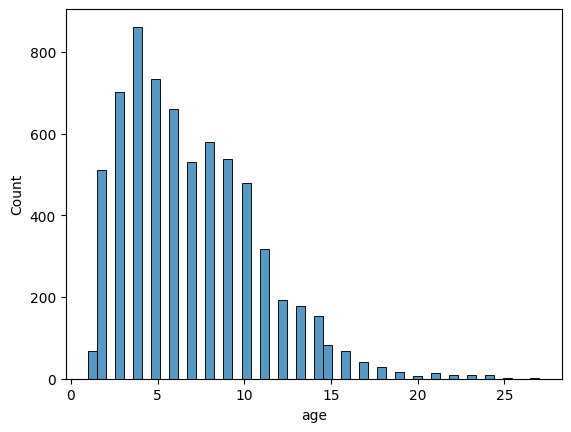

In [ ]:
sns.histplot(df.age)

Как видим, данные распределены неравномерно, подавляющее большинство машин не старше 13 лет. Попробуем сбалансировать данные.

In [ ]:
print('Количество машин старше 13 лет:', df[df.age > 13].shape[0])

Количество машин старше 13 лет: 440


Заменим все возрасты больше 13 цифрой 14.

In [ ]:
df['age'] = np.where(df['age'] > 13, 14, df['age'])
df.age.nunique()

14

<Axes: xlabel='age', ylabel='Count'>

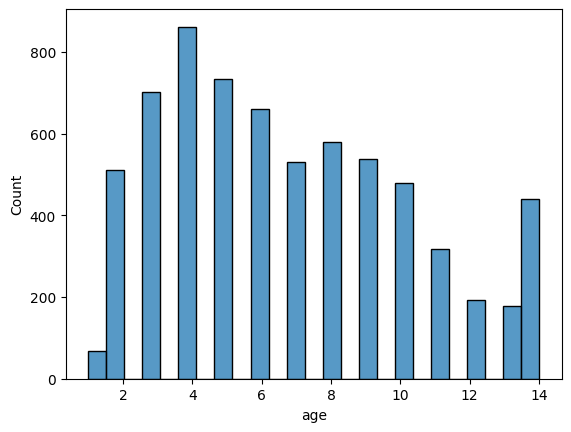

In [ ]:
sns.histplot(df.age)

С таким распределением нашей модели будет гораздо легче справиться.

<Axes: xlabel='age', ylabel='selling_price'>

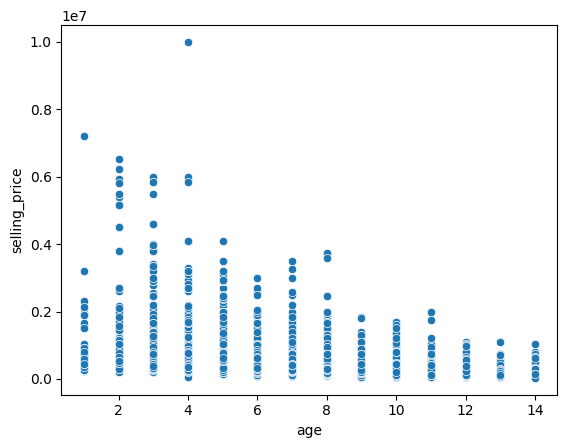

In [ ]:
sns.scatterplot(x=df['age'], y=df['selling_price'])

Как видим, стоимость лишь частично коррелирует с возрастом автомобиля.

##Mileage

Посмотрим на переменную milage.

In [ ]:
df['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '23.0 kmpl', '16.1 kmpl', '20.14 kmpl',
       '17.3 km/kg', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', '18.9 kmpl', '18.15 kmpl', '19.7 kmpl', '22.54 kmpl',
       '21.0 kmpl', '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '33.44 km/kg', '23.95 kmpl', '17.0 kmpl', '20.63 kmpl',
       '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '12.55 kmpl', '12.99 kmpl',
       '14.8 kmpl', '13.5 kmpl', '26.0 kmpl', '27.3 kmpl', '11.36 kmpl',
       '17.68 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '26.2 km/kg', '16.47 kmpl',
       '15.04 kmpl', '18.5 kmpl', '19.1 kmpl', '21.79 kmpl', '18.8 kmpl',
       '2

Как видим, числа находятся в разных диапазонах: км/л или км/кг. Хотелось бы это унифицировать, однако проблема в том, что у разного топлива разная плотность. Поэтому пока разобьем на две колонки: значение и единица

In [ ]:
df['mileage_count'] = df['mileage'].apply(lambda x: float(x.split(' ')[0]) if type(x) == str else None)

In [ ]:
df['mileage_measure'] = df['mileage'].apply(lambda x: x.split(' ')[1] if type(x) == str else None)

Убедимся, что данные не потеряны.

In [ ]:
df.mileage.isna().sum() == df.mileage_count.isna().sum()

True

Посмотрим, в каких случаях у нас меняется единица измерения. По логике вещей, это должно быть связано с типом топлива.

In [ ]:
df[df['mileage_measure'] == 'km/kg'].fuel.unique()

array(['LPG', 'CNG'], dtype=object)

In [ ]:
df[df['mileage_measure'] == 'kmpl'].fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

Видимо, в случае с электрическим топливом mileage == None. Путем простого гугления получаем, что литр дизеля весит 0,84 кг, литр бензина 0,75 кг. Что и применим к данным.

In [ ]:
df['mileage_count'][df.fuel=='Petrol'] = df['mileage_count'][df.fuel=='Petrol'].apply(lambda x: x * 0.75)

<ipython-input-25-dc8cdcf09e50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_count'][df.fuel=='Petrol'] = df['mileage_count'][df.fuel=='Petrol'].apply(lambda x: x * 0.75)


In [ ]:
df['mileage_count'][df.fuel=='Diesel'] = df['mileage_count'][df.fuel=='Diesel'].apply(lambda x: x * 0.85)

<ipython-input-26-6b58cf86ffbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_count'][df.fuel=='Diesel'] = df['mileage_count'][df.fuel=='Diesel'].apply(lambda x: x * 0.85)


Mileage_measure можно убрать, так как эта информация содержится в столбце fuel.

In [ ]:
df = df.drop(columns=['mileage_measure'])

Посмотрим, как mileage соотносится с selling price.

<Axes: xlabel='mileage_count', ylabel='selling_price'>

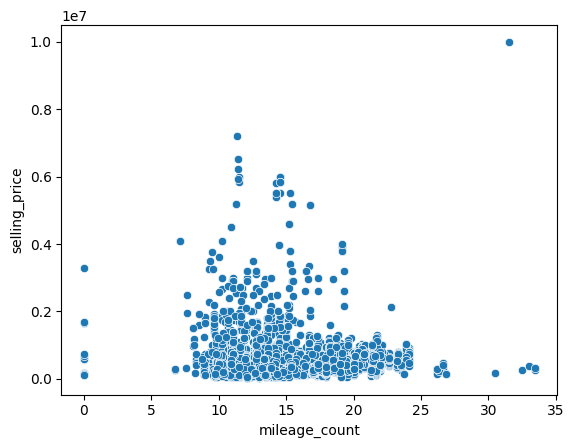

In [ ]:
sns.scatterplot(x=df['mileage_count'], y=df['selling_price'])

Очень слабая зависимость.

##Engine

Посмотрим на данные.

In [ ]:
df.engine.unique()

array(['1248 CC', '1498 CC', '1396 CC', '1298 CC', '1197 CC', '1061 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', '1198 CC',
       '998 CC', '1591 CC', '2179 CC', '1368 CC', '1497 CC', '2982 CC',
       '2494 CC', '2143 CC', '2477 CC', '2755 CC', '1968 CC', '1196 CC',
       '1373 CC', '1598 CC', '1998 CC', '1086 CC', '1194 CC', '1798 CC',
       '1405 CC', '1582 CC', '999 CC', '2487 CC', '1999 CC', '2987 CC',
       '1995 CC', '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC',
       '1991 CC', '2362 CC', '1493 CC', '1341 CC', '1199 CC', '1794 CC',
       '1193 CC', '2696 CC', '799 CC', '1495 CC', '1186 CC', '1047 CC',
       '2498 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '793 CC', '1799 CC', '936 CC', '1956 CC', '814 CC',
       '1997 CC', '1948 CC', '2997 CC', '1172 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '1462 CC',
       '2956 CC', '1527 CC', '2199 CC', '995 CC', '1599 CC',

Единица измерения одна, поэтому обработать колонку гораздо проще.

In [ ]:
df['engine_volume'] = df['engine'].apply(lambda x: float(x.split(' ')[0]) if type(x) == str else None)

<Axes: xlabel='engine_volume', ylabel='selling_price'>

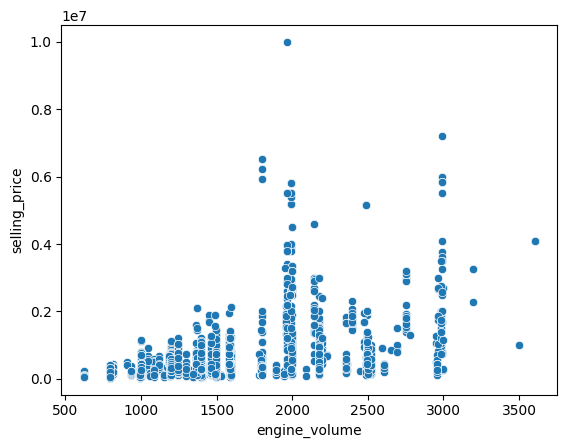

In [ ]:
sns.scatterplot(x=df['engine_volume'], y=df['selling_price'])

Есть тенденция к увеличению стоимости машины при увеличени  объема двигателя.

##Max_power

Так же поступим с max_power.

In [ ]:
df.max_power.unique()

array(['74 bhp', '103.52 bhp', '90 bhp', '88.2 bhp', '81.86 bhp',
       '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '46.3 bhp', '88.73 bhp',
       '64.1 bhp', '98.6 bhp', '88.8 bhp', '83.1 bhp', '47.3 bhp',
       '73.8 bhp', '34.2 bhp', '88.5 bhp', '35 bhp', '40.3 bhp',
       '121.3 bhp', '138.03 bhp', '160.77 bhp', '117.3 bhp', '116.3 bhp',
       '67.05 bhp', '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp',
       '175.56 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '120 bhp', '94.68 bhp', '160 bhp', '155 bhp', '69.01 bhp',
       '126.32 bhp', '138.1 bhp', '83.14 bhp', '83.8 bhp', '126.2 bhp',
       '62.1 bhp', '86.7 bhp', '188 bhp', '214.56 bhp', '177 bhp',
       '148.31 bhp', '254.

In [ ]:
df['max_power_count'] = df['max_power'].apply(lambda x: float(x.strip().split(' ')[0]) if type(x) == str and x!=' bhp' else None)

Проверим количество Nan-ов

In [ ]:
print(df.max_power.isna().sum(), df.max_power_count.isna().sum())

0 1


Как видим, потеряли всего одно значение, которое в таблице выглядело как ' bhp' (без числа), то есть ничего не потеряли.

<Axes: xlabel='max_power_count', ylabel='selling_price'>

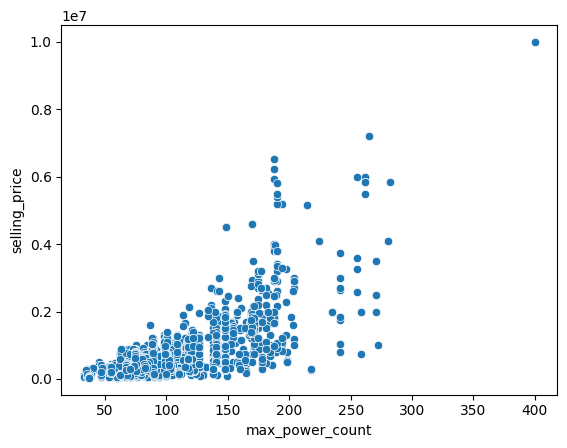

In [ ]:
sns.scatterplot(x=df['max_power_count'], y=df['selling_price'])

Примерно то же самое, что в предыдущем случае.

## Torque

In [ ]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm', '200Nm@ 1750rpm',
       '115Nm@ 4000rpm', '69Nm@ 3500rpm', '172.5Nm@ 1750rpm',
       '6.1kgm@ 3000rpm', '60Nm@ 3500rpm', '90Nm@ 3500rpm',
       '151Nm@ 4850rpm', '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm',
       '250Nm@ 1750-2500rpm', '145Nm@ 4600rpm', '146Nm@ 4800rpm',
       '343Nm@ 1400-3400rpm', '200Nm@ 1400-3400rpm',
       '200Nm@ 1250-4000rpm', '400Nm@ 2000-2500rpm',
       '360Nm@ 1200-3400rpm', '200Nm@ 1200-3600rpm',
       '380Nm@ 1750-2500rpm', '400Nm@ 1750-3000rpm',
       '400Nm@ 1400-2800rpm', '200Nm@ 1750-3000rpm', '111.7Nm@ 4000rpm',
       '219.6Nm@ 1500-2750rpm', '112Nm@ 4000rpm', '250Nm@ 1500-3000rpm',
       '130Nm@

Здесь данные отформатированы весьма разнообразно, придется много переделывать.

In [ ]:
df['torque'] = df['torque'].apply(lambda x: x.replace('at', '@') if type(x) == str else None)
df['torque'] = df['torque'].apply(lambda x: x.replace('/', '@') if type(x) == str else None)

Итак, первая часть представляет собой значение крутящего момента в ньютон-метрах. Отделим ее от второй.

In [ ]:
df['torque_1'] = df.torque.apply(lambda x: x.split('@', maxsplit=1)[0].lower() if type(x) == str else None)

In [ ]:
def count_nm(x: str):
  if 'nm' in x:
    x = x.replace('nm', '')
    x = x.strip()
    if '(' in x:
      if '380' in x:
        return 380.0
    else:
      return float(x)
  elif 'kgm' in x:
    x = x.replace('kgm', '')
    x = x.strip()
    return float(x) * 9.8
  else:
    if float(x) > 100:
      return float(x)
    else:
      return float(x) * 9.8

In [ ]:
df['torque_1'] = df['torque_1'].apply(lambda x: count_nm(x) if type(x) == str else None )

In [ ]:
df['rpm'] = df['torque'].apply(lambda x: x.split('@', maxsplit=1)[1].lower() if type(x) == str and '@' in x else None)

In [ ]:
def process_rpm(x: str):
  x = x.replace('(kgm@ rpm)', '')
  x = x.replace('rpm', '')
  x = x.strip()
  x = x.replace(',', '')
  x = x.replace('+@', '')
  x = x.replace('(nm@ )', '')
  if '-' in x:
    rpm = x.split('-')
    rpm[0] = int(rpm[0])
    rpm[1] = int(rpm[1])
  elif '~' in x:
    rpm = x.split('~')
    rpm[0] = int(rpm[0])
    rpm[1] = int(rpm[1])
  else:
    rpm = [int(x), int(x)]
  return rpm

In [ ]:
df['rpm'] = df['rpm'].apply(lambda x: process_rpm(x) if type(x) == str else None)

In [ ]:
df.rpm.isna().sum()

29

Странно, но...

In [ ]:
df[df['rpm'].isna()]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,age,mileage_count,engine_volume,max_power_count,torque_1,rpm
129,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,3,15.3,1969.0,190.0,400.0,None
361,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
567,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
929,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
947,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
962,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
978,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
1468,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
1568,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None
2293,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,2,15.3,1969.0,190.0,400.0,None


Всё в порядке!

In [ ]:
df['rpm_min'] = df['rpm'].apply(lambda x: x[0] if x is not None else None)
df['rpm_max'] = df['rpm'].apply(lambda x: x[1] if x is not None else None)

In [ ]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'age', 'mileage_count', 'engine_volume', 'max_power_count',
       'torque_1', 'rpm', 'rpm_min', 'rpm_max'],
      dtype='object')

Для модели будем исключать из таблицы следующие колонки: year, mileage, engine, max_power, torque, rpm.

In [ ]:
x = df.drop(columns=['year', 'mileage', 'engine', 'max_power', 'torque', 'rpm'])

In [ ]:
x.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,age,mileage_count,engine_volume,max_power_count,torque_1,rpm_min,rpm_max
0,450000,145500,Diesel,Individual,Manual,First Owner,5.0,7,19.890,1248.0,74.00,190.00,2000.0,2000.0
1,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,7,17.969,1498.0,103.52,250.00,1500.0,2500.0
2,225000,127000,Diesel,Individual,Manual,First Owner,5.0,11,19.550,1396.0,90.00,219.52,1750.0,2750.0
3,130000,120000,Petrol,Individual,Manual,First Owner,5.0,14,12.075,1298.0,88.20,112.70,4500.0,4500.0
4,440000,45000,Petrol,Individual,Manual,First Owner,5.0,4,15.105,1197.0,81.86,113.75,4000.0,4000.0


<Axes: >

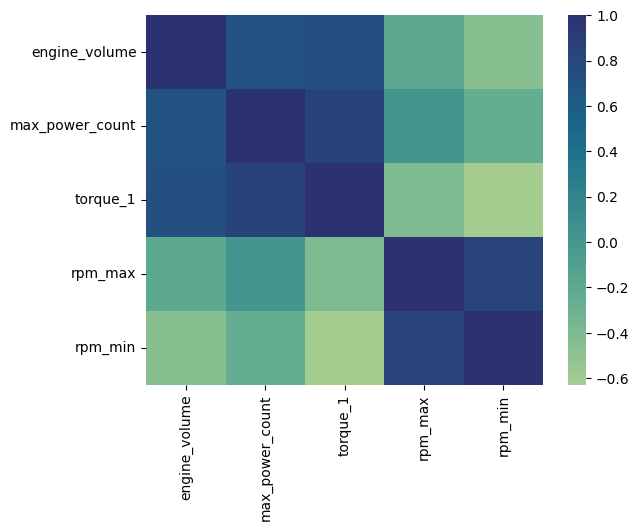

In [ ]:
corr = df[['engine_volume','max_power_count', 'torque_1', 'rpm_max', 'rpm_min']].corr()

sns.heatmap(corr, cmap="crest")

Видим, что engine_volume тесно коррелирует с max_power_count и torque_1 (что и логично). Пока убирать не будем, можно будет поэкспериментировать с этим и посмотреть, как будут себя вести различные модели.

## Разбиение данных на выборки и нормализация

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    6797 non-null   int64  
 1   km_driven        6797 non-null   int64  
 2   fuel             6797 non-null   object 
 3   seller_type      6797 non-null   object 
 4   transmission     6797 non-null   object 
 5   owner            6797 non-null   object 
 6   seats            6797 non-null   float64
 7   age              6797 non-null   int64  
 8   mileage_count    6797 non-null   float64
 9   engine_volume    6797 non-null   float64
 10  max_power_count  6796 non-null   float64
 11  torque_1         6796 non-null   float64
 12  rpm_min          6768 non-null   float64
 13  rpm_max          6768 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 1.0+ MB


30 строчек погоды не сделают, можно дропнуть.

In [ ]:
x = x.dropna()

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6768 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   selling_price    6768 non-null   int64  
 1   km_driven        6768 non-null   int64  
 2   fuel             6768 non-null   object 
 3   seller_type      6768 non-null   object 
 4   transmission     6768 non-null   object 
 5   owner            6768 non-null   object 
 6   seats            6768 non-null   float64
 7   age              6768 non-null   int64  
 8   mileage_count    6768 non-null   float64
 9   engine_volume    6768 non-null   float64
 10  max_power_count  6768 non-null   float64
 11  torque_1         6768 non-null   float64
 12  rpm_min          6768 non-null   float64
 13  rpm_max          6768 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 793.1+ KB


In [ ]:
y = x['selling_price']
x = x.drop(['selling_price'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Попробуем разные энкодеры.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

categorical = ['seller_type', 'transmission', 'fuel', 'owner']
numeric_features = [col for col in x_train.columns if col not in categorical]

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

X_train_st = column_transformer.fit_transform(x_train)
X_test_st = column_transformer.transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm_column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])
X_train_mm = mm_column_transformer.fit_transform(x_train)
X_test_mm = mm_column_transformer.transform(x_test)

In [ ]:
simple_column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical)
])
X_train_simple = simple_column_transformer.fit_transform(x_train)
X_test_simple = simple_column_transformer.transform(x_test)

In [ ]:
colnames = list(column_transformer.transformers_[0][1].get_feature_names_out())

In [ ]:
colnames_1 = list(column_transformer.transformers_[1][1].get_feature_names_out())

In [ ]:
colnames.extend(colnames_1)

In [ ]:
colnames

['seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Automatic',
 'transmission_Manual',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
 'km_driven',
 'seats',
 'age',
 'mileage_count',
 'engine_volume',
 'max_power_count',
 'torque_1',
 'rpm_min',
 'rpm_max']

#Обучение модели

Попробуем обучить на наших данных разные модели.

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor, ElasticNetCV, LarsCV, LassoCV

from sklearn.metrics import mean_squared_error
def get_mse(model, trainset, testset):
  model.fit(trainset, y_train)
  pred = model.predict(testset)
  return mean_squared_error(y_test, pred)

In [ ]:
models = [LinearRegression(), RidgeCV(), SGDRegressor(), ElasticNetCV(), LarsCV(), LassoCV(), ExtraTreesRegressor(), RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), GradientBoostingRegressor()]
mm_metrics = []
for model in models:
  mm_metrics.append(get_mse(model, X_train_mm, X_test_mm))

In [ ]:
models = [LinearRegression(), RidgeCV(), SGDRegressor(), ElasticNetCV(), LarsCV(), LassoCV(), ExtraTreesRegressor(), RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), GradientBoostingRegressor()]
st_metrics = []
for model in models:
  st_metrics.append(get_mse(model, X_train_st, X_test_st))

In [ ]:
models = [LinearRegression(), RidgeCV(), SGDRegressor(), ElasticNetCV(), LarsCV(), LassoCV(), ExtraTreesRegressor(), RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor(), GradientBoostingRegressor()]
simple_metrics = []
for model in models:
  simple_metrics.append(get_mse(model, X_train_simple.toarray(), X_test_simple))

In [ ]:
model_names = ['LinearRegression', 'RidgeCV', 'SGDRegressor', 'ElasticNetCV', 'LarsCV', 'LassoCV', 'ExtraTreesRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'BaggingRegressor', 'GradientBoostingRegressor']

In [ ]:
matrix_results = pd.DataFrame({'model': model_names, 'MinMax': mm_metrics, 'Standard': st_metrics, 'Simple': simple_metrics})

In [ ]:
matrix_results

,model,MinMax,Standard,Simple
0,LinearRegression,1.969450e+11,1.967154e+11,2.986944e+11
1,RidgeCV,1.966543e+11,1.972342e+11,2.985204e+11
2,SGDRegressor,1.931497e+11,1.973508e+11,2.988935e+11
3,ElasticNetCV,5.514596e+11,5.498815e+11,5.516995e+11
4,LarsCV,3.964857e+11,1.949206e+11,4.078268e+11
5,LassoCV,1.950167e+11,1.962637e+11,2.984920e+11
6,ExtraTreesRegressor,1.516535e+10,1.478930e+10,2.309910e+11
7,RandomForestRegressor,1.590825e+10,1.629780e+10,2.307269e+11
8,AdaBoostRegressor,1.188468e+11,1.215561e+11,3.142318e+11
9,BaggingRegressor,1.646554e+10,2.035175e+10,2.307137e+11


Как видим, минимальное значение получается на ExtraTreesRegressor при использовании StandardScaler. Будем подбирать параметры для этой модели.

In [ ]:
!pip install optuna

In [ ]:
import optuna
?optuna.integration.OptunaSearchCV

In [ ]:
etr = ExtraTreesRegressor()
param_distributions = {
    'n_estimators': optuna.distributions.IntDistribution(100, 10000, False, 100),
    'min_samples_split': optuna.distributions.IntDistribution(2, 20, False, 2),
    'min_samples_leaf': optuna.distributions.IntDistribution(1, 15, False, 2),
    'max_depth': optuna.distributions.IntDistribution(10, 30, False, 2)
}

In [ ]:
optuna_search = optuna.integration.OptunaSearchCV(etr, param_distributions)
optuna_search.fit(X_train_st, y_train)

<ipython-input-106-2199eaafc411>:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = optuna.integration.OptunaSearchCV(etr, param_distributions)
[I 2023-06-27 04:05:04,851] A new study created in memory with name: no-name-76b6f9e9-a7a2-4c3c-802f-00059340c442
[I 2023-06-27 04:06:30,156] Trial 0 finished with value: 0.9186152950229465 and parameters: {'n_estimators': 2400, 'min_samples_split': 14, 'min_samples_leaf': 15, 'max_depth': 24}. Best is trial 0 with value: 0.9186152950229465.
[I 2023-06-27 04:11:54,525] Trial 1 finished with value: 0.9187784024950545 and parameters: {'n_estimators': 9100, 'min_samples_split': 6, 'min_samples_leaf': 15, 'max_depth': 16}. Best is trial 1 with value: 0.9187784024950545.
[I 2023-06-27 04:14:34,220] Trial 2 finished with value: 0.9214866845438371 and parameters: {'n_estimators': 4800, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_depth': 10}. Best is trial

OptunaSearchCV(estimator=ExtraTreesRegressor(), n_jobs=1,
               param_distributions={'max_depth': IntDistribution(high=30, log=False, low=10, step=2),
                                    'min_samples_leaf': IntDistribution(high=15, log=False, low=1, step=2),
                                    'min_samples_split': IntDistribution(high=20, log=False, low=2, step=2),
                                    'n_estimators': IntDistribution(high=10000, log=False, low=100, step=100)})

In [ ]:
my_model = optuna_search.best_estimator_

In [ ]:
my_model.feature_importances_

array([6.07070113e-02, 5.64645915e-03, 7.05899438e-04, 1.27138428e-01,
       1.29182586e-01, 3.31180025e-06, 4.57908055e-03, 3.44959749e-06,
       2.24663178e-03, 5.78333755e-03, 1.94760491e-06, 6.31132735e-04,
       0.00000000e+00, 2.61391650e-05, 3.66825572e-02, 7.52692301e-03,
       1.45661876e-01, 1.32734001e-02, 5.73228483e-02, 2.57723962e-01,
       1.25371383e-01, 8.86561290e-03, 1.09160237e-02])

In [ ]:
features = pd.DataFrame({'params': colnames, 'values': my_model.feature_importances_})
features.sort_values(by=['values'], ascending=False)

,params,values
19,max_power_count,0.257724
16,age,0.145662
4,transmission_Manual,0.129183
3,transmission_Automatic,0.127138
20,torque_1,0.125371
0,seller_type_Dealer,0.060707
18,engine_volume,0.057323
14,km_driven,0.036683
17,mileage_count,0.013273
22,rpm_max,0.010916


Что ж, важность фичей вопросов с точки зрения интуиции не вызывает.

In [ ]:
mean_squared_error(y_test, my_model.predict(X_test_st))

19896624768.089745

In [ ]:
print('Predictions mean:', preds.mean(), 'standard deviation:', preds.std())
print('Selling price mean:', df.selling_price.mean(), 'standard deviation', df.selling_price.std())

Predictions mean: 628823.8196281209 standard deviation: 732419.4946548749
Selling price mean: 651657.6240988672 standard deviation 816716.4903396886
